## Model Analysis

### General overview of the data distribution

In [1]:
import nbimporter
import seaborn as sns
import model_functions as nb
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = nb.process_data()
df = nb.bin_data(df)

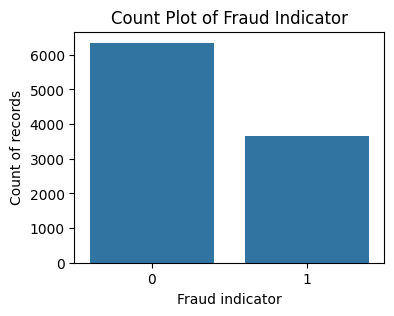

In [3]:
# display the count of fraud and non-fraud records
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='is_fraud')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud indicator')
plt.ylabel('Count of records')
plt.show()

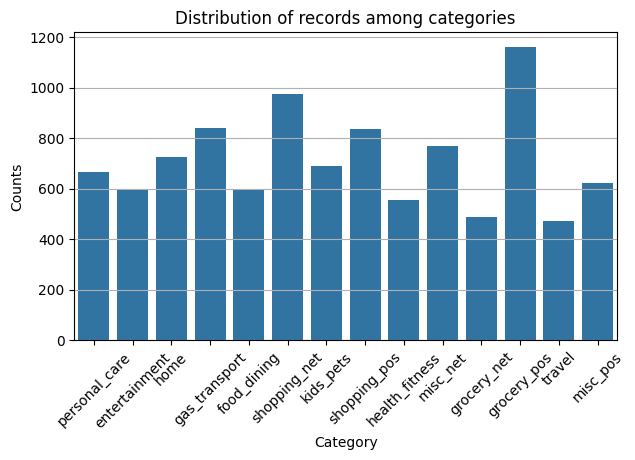

In [4]:
plt.figure(figsize=(7,4))
plt.title('Distribution of records among categories')
sns.countplot(data=df,x='category')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

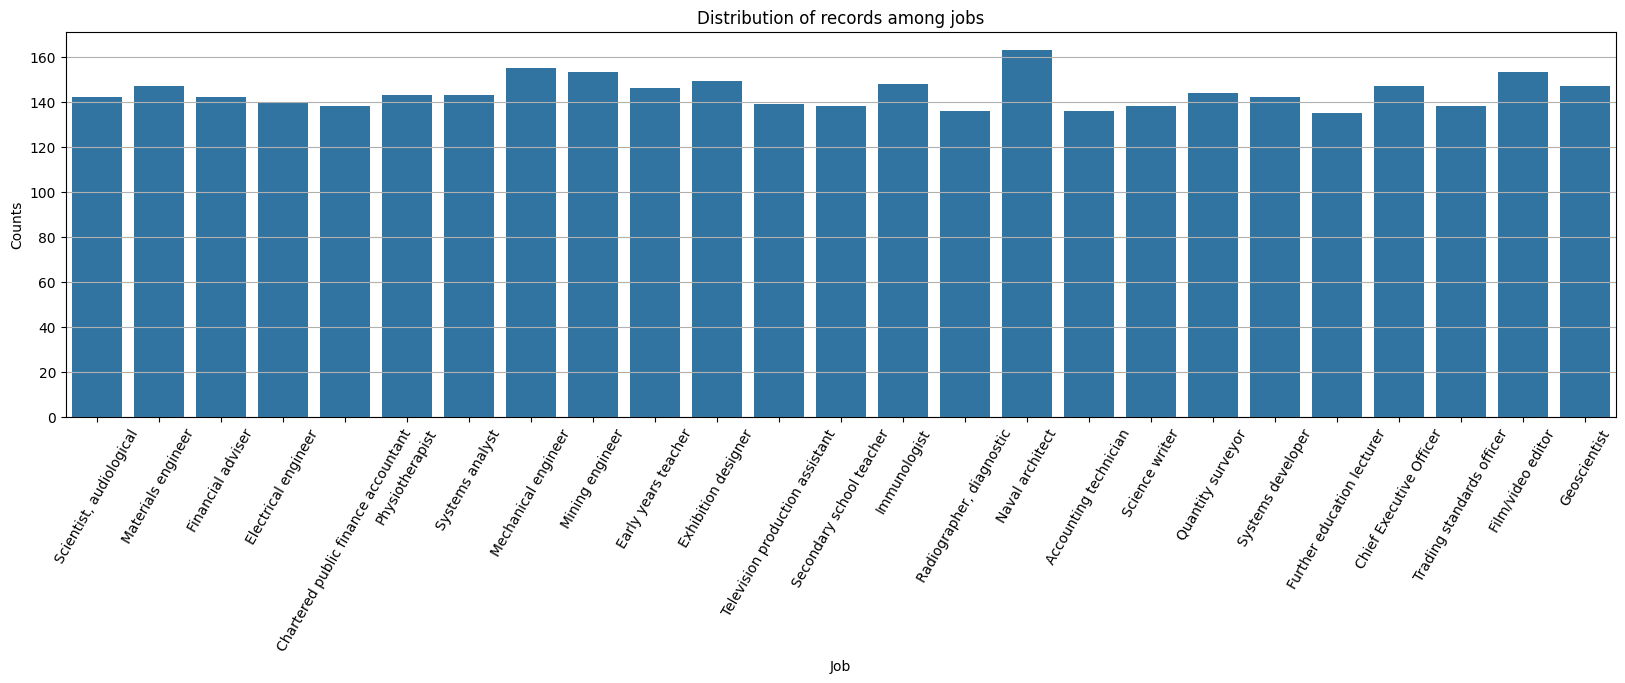

In [5]:
# top 30 most frequent jobs
top_20_jobs = df['job'].value_counts().nlargest(25).index

# include only the top 30 jobs
df_top_20_jobs = df[df['job'].isin(top_20_jobs)]
plt.figure(figsize=(20,5))
plt.title('Distribution of records among jobs')
sns.countplot(data=df_top_20_jobs,x='job')
plt.xlabel('Job')
plt.xticks(rotation=60)
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

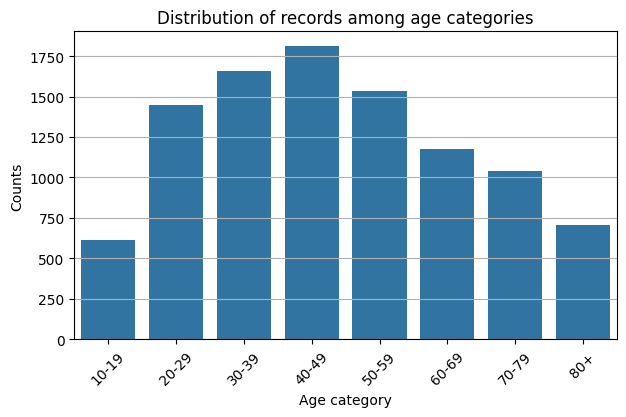

In [6]:
plt.figure(figsize=(7,4))
plt.title('Distribution of records among age categories')
sns.countplot(data=df,x='age_category')
plt.xlabel('Age category')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

### Choosing the optimal model

In [7]:
# evaluate the performance of different classification models
res = nb.evaluate_classification_models()
for model_name, model_metrics in res.items():
     print(f"{model_name} metrics:")
     for metric, value in model_metrics.items():
         print(f"{metric}: {value}")
     print()

Decision Tree Classifier metrics:
Accuracy: 0.697
Precision: 0.5612104539202201
Recall: 0.5870503597122302
F1 Score: 0.5738396624472574
ROC AUC (Receiver Operating Characteristic - Area Under the Curve): 0.6713029576338928

Logistic regression classifier metrics:
Accuracy: 0.6965
Precision: 0.6666666666666666
Recall: 0.25323741007194245
F1 Score: 0.3670490093847758
ROC AUC (Receiver Operating Characteristic - Area Under the Curve): 0.5929022299401858

Random Forest Classifier metrics:
Accuracy: 0.7605
Precision: 0.7523364485981309
Recall: 0.4633093525179856
F1 Score: 0.5734639358860196
ROC AUC (Receiver Operating Characteristic - Area Under the Curve): 0.6910416494390695

Support Vector Machine (SVM) metrics:
Accuracy: 0.733
Precision: 0.8926829268292683
Recall: 0.2633093525179856
F1 Score: 0.4066666666666667
ROC AUC (Receiver Operating Characteristic - Area Under the Curve): 0.6232255574850464

K-Nearest Neighbors (KNN) metrics:
Accuracy: 0.679
Precision: 0.556989247311828
Recall: 0.3

After evaluating the performance of different classification models on the dataset, it seems that Random Forest Classifier has a strong overall performance among others with a high accuracy up to 75.6%, a strong precision around 80%, a good recall of 46.5%, and resulting in the best F1 score among others to be 58.6% balancing precision and recall well, making the model a good choice for fraud detection.

The ROC AUC being about 70% gives us an overall picture about the model being effective but needs some improvements.

In [8]:
# predicting the value of a json formt
data = {
    "merchant": "Abbott Rogahn",
    "category": "health_fitness",
    "amt": 2300,
    "street": "48059 Robyn Hills Suite 238",
    "city": "Lake Amyton",
    "state": "Utah",
    "job": "Podiatrist",
    "dob": datetime.strptime("1988-06-10", "%Y-%m-%d"),
    "customer_name": "Micheal Frederick",
    "fraud_type": 1,
    "trans_year": 2020,
    "trans_month": 11,
    "trans_day": 17,
    "trans_hour": 17,
    "trans_minute": 36,
    "trans_second": 45,
    "m_street": "PSC 6953, Box 6170",
    "m_city": "APO AE 93397",
    "m_state": "Box"
}
result = nb.model_prediction(data)
print(result)

[0]


## Metrics analysis

Best Model Evaluation Metrics:
Accuracy: 0.748
Precision: 0.7470449172576832
Recall: 0.4431977559607293
F1 Score: 0.5563380281690141
ROC AUC (Receiver Operating Characteristic - Area Under the Curve): 0.680029336410823
Confusion Matrix:
[[1180  107]
 [ 397  316]]


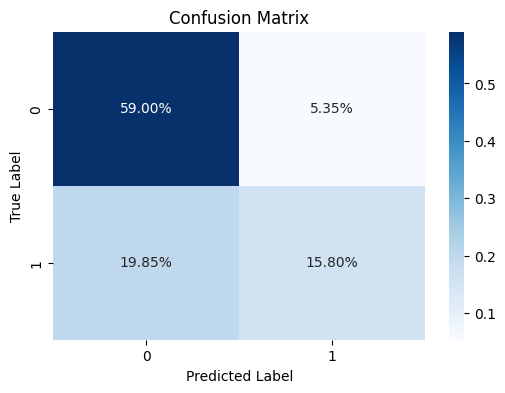

In [9]:
# tuning the best model and evaluating the metrics
nb.best_model_tuning_and_evaluation()

After tuning the hyperparameters of the Random Forest classification model, and according to the confusion matrix displayed I noticed that:
- The accuracy of 75% was distributed by 57% true negatives and 18% true positives, while the other 25% was distributed by 19% of positives and 18% of negatives were predicted incorrectly
- The model has good precision of 75% so it reduces the percentage of false positives, but has a low recall of 48% this means that it is missing a lot of actual fraud cases

As for the accuracy the model seeems effective though we may need to sacrifice some precision for a higher recall.